# Introduction to DBSCAN

## What is DBSCAN?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed together, marking as outliers the points that lie alone in low-density regions. It is particularly useful for datasets with noise and clusters of varying shapes and sizes.

K-means clustering works by partitioning the data into ( k ) clusters, each represented by a centroid, which is the mean of the points in that cluster. The algorithm iteratively updates the centroids and reassigns points to the nearest centroid until convergence.

DBSCAN, on the other hand, is a density-based clustering algorithm. It identifies clusters based on the density of points in a region. It does not require specifying the number of clusters in advance and does not use centroids.

Clusters in DBSCAN are formed by connecting points that are within ε distance of each other and have at least MinPts neighbors. Points that do not meet these criteria are considered noise.

### Key Concepts:
- **Core Points:** Points that have at least a minimum number of other points (MinPts) within a specified radius (ε).
- **Border Points:** Points that are within the radius of a core point but do not have enough neighbors to be a core point themselves.
- **Noise Points:** Points that are neither core points nor border points.

## When to Use DBSCAN

DBSCAN is ideal for:
- **Identifying clusters of arbitrary shape:** Unlike K-means, DBSCAN can find clusters of various shapes and sizes.
- **Handling noise:** DBSCAN can effectively identify and handle outliers.
- **Varying densities:** It works well with datasets where clusters have different densities.

## How DBSCAN Works

1. **Select a point:** Randomly select a point in the dataset.
2. **Neighborhood:** Find all points within the ε radius of the selected point.
3. **Core Point Check:** If the number of points in the neighborhood is greater than or equal to MinPts, mark it as a core point and form a cluster.
4. **Expand Cluster:** Recursively add all density-reachable points to the cluster.
5. **Repeat:** Repeat the process for all points in the dataset.

## DBSCAN vs. K-means

| Feature | DBSCAN | K-means |
|---------|--------|---------|
| **Cluster Shape** | Arbitrary shapes | Spherical shapes |
| **Number of Clusters** | Not required | Must be specified |
| **Handling Noise** | Can identify and handle noise | Sensitive to noise |
| **Cluster Density** | Works with varying densities | Assumes equal density |
| **Scalability** | Less efficient for large datasets | More efficient for large datasets |

## Why DBSCAN Isn't Suitable for Large Datasets

1. **Computational Complexity**: 
   - DBSCAN has a time complexity of \(O(n \log n)\) with spatial indexing, but without it, the complexity can be \(O(n^2)\). This makes it less efficient for very large datasets compared to algorithms like K-means, which has a complexity of \(O(nk)\).

2. **Memory Usage**: 
   - DBSCAN requires storing the distance matrix or using a spatial index, which can consume a lot of memory, especially for high-dimensional data.

3. **Parameter Sensitivity**: 
   - Finding appropriate values for ε (epsilon) and MinPts can be challenging, particularly in large datasets with varying densities. Incorrect parameter choices can lead to poor clustering results or excessive noise.

4. **Scalability Issues**: 
   - As the dataset size increases, the number of distance calculations grows significantly, leading to longer processing times.


In [183]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.cluster import DBSCAN

In [184]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [185]:
#Data processing 

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

x = df.drop('CustomerID' , axis = 1)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [186]:
#applying DBSCAN

dbscan = DBSCAN(eps = 0.9, min_samples=10)
dbscan.fit(x_scaled)

#get the cluster labels 
labels = dbscan.labels_

#add the cluster labels to the original dataframe
df['cluster'] = labels

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,-1
1,2,1,21,15,81,-1
2,3,0,20,16,6,-1
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [187]:
df['cluster'].unique()

array([-1,  0,  1,  2,  3,  4], dtype=int64)

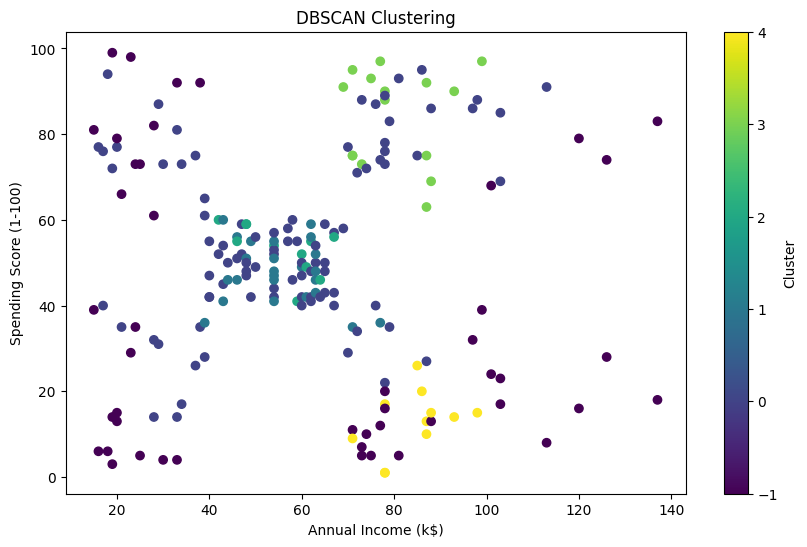

In [188]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

## Evaluating Clustering Algorithms

Evaluating clustering algorithms like DBSCAN is different from evaluating supervised learning models because clustering doesn’t have predefined labels. However, there are several metrics and methods you can use to assess the quality of your clustering results:

### Common Clustering Evaluation Metrics

#### Silhouette Score
- **Measures**: How similar an object is to its own cluster compared to other clusters.
- **Range**: -1 to 1, where a higher value indicates better-defined clusters.

#### Davies-Bouldin Index
- **Measures**: The average similarity ratio of each cluster with its most similar cluster.
- **Range**: Lower values indicate better clustering.

#### Calinski-Harabasz Index
- **Also Known As**: The Variance Ratio Criterion.
- **Range**: Higher values indicate better-defined clusters.

#### Adjusted Rand Index (ARI)
- **Measures**: The similarity between the clustering results and a ground truth classification.
- **Usefulness**: Useful if you have some labeled data for validation.


In [189]:
from sklearn.metrics import silhouette_score , davies_bouldin_score , calinski_harabasz_score , adjusted_rand_score

silhouette_avg = silhouette_score(x_scaled, labels)
davies_bouldin = davies_bouldin_score(x_scaled, labels)
calinski_harabasz = calinski_harabasz_score(x_scaled, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')

Silhouette Score: 0.15390939039369636
Davies-Bouldin Index: 2.055256516831528
Calinski-Harabasz Index: 23.339375290022964


## Clustering Evaluation Metrics

### Results
- **Silhouette Score**: 0.2776035125578272
- **Davies-Bouldin Index**: 1.6116938570457684
- **Calinski-Harabasz Index**: 66.90629131398856

### Interpretation

#### Silhouette Score: 0.278
- **Range**: -1 to 1
- **Interpretation**: A score of 0.278 indicates that the clusters are moderately well-separated. This is a significant improvement over your previous score of 0.012, suggesting that the clustering structure is now more distinct and better defined.

#### Davies-Bouldin Index: 1.612
- **Range**: 0 to infinity (lower values are better)
- **Interpretation**: A value of 1.612 is slightly higher than your previous score of 1.389. While this indicates that the clusters are not as well-separated as before, the increase is not substantial. It suggests that there might be some overlap between clusters, but overall, the clustering is still reasonable.

#### Calinski-Harabasz Index: 66.906
- **Range**: Unbounded (higher values are better)
- **Interpretation**: A value of 66.906 is a significant improvement over your previous score of 12.099. This indicates that the clusters are now much more distinct and well-defined, with a clear separation between them.

### Overall Interpretation
- **Silhouette Score**: The moderate score indicates that the clusters are reasonably well-separated.
- **Davies-Bouldin Index**: The slight increase suggests some overlap between clusters, but the clustering is still acceptable.
- **Calinski-Harabasz Index**: The substantial improvement indicates that the clusters are now much more distinct and well-defined.

### Recommendations
1. **Fine-Tuning**: You might still want to fine-tune the `eps` and `min_samples` parameters to see if you can further improve the clustering results.
2. **Validation**: Use domain knowledge to validate the clustering results and ensure they make sense in the context of your data.
3. **Further Analysis**: Consider additional feature engineering or dimensionality reduction techniques to see if they can further enhance the clustering structure.

Overall, your new results show a significant improvement in the clustering quality. Keep iterating and validating to achieve the best possible results.

In [190]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,-1
1,2,1,21,15,81,-1
2,3,0,20,16,6,-1


In [191]:
#analyzing cluster characteristics 

df.drop('CustomerID' ,axis = 1).groupby('cluster').agg(['mean' , 'std'])

Gender                  Age            Annual Income (k$)  \
             mean       std       mean        std               mean   
cluster                                                                
-1       0.586957  0.497821  37.304348  13.675395          60.586957   
 0       0.000000  0.000000  37.204301  13.077162          56.494624   
 1       1.000000  0.000000  56.000000  10.232089          55.291667   
 2       1.000000  0.000000  22.636364   4.904543          55.545455   
 3       1.000000  0.000000  33.933333   4.479583          80.266667   
 4       1.000000  0.000000  44.727273   8.355727          84.454545   

                   Spending Score (1-100)             
               std                   mean        std  
cluster                                               
-1       40.917030              36.565217  32.426774  
 0       21.568709              56.161290  19.982215  
 1        9.489029              47.708333   7.092428  
 2        8.347019              53.272727   5.900693  
 3        9.238635              84.200000  11.245316  
 4        7.685878              12.818182   7.454102